# Data Cleaning | Data Analysis | Outlier Handling | visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/kaggle/input/train-data/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# df.columns[df.isnull().any()]

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['Age']= df['Age'].fillna(df['Age'].median())

In [10]:
df.isna().sum()[df.isna().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [11]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
df['Cabin_Num']= df['Cabin'].str.extract('(\d+)')
df['Cabin_Cate']= df['Cabin'].str[0]

In [14]:
df['Cabin_Num']= pd.to_numeric(df['Cabin_Num'], errors= 'coerce')

In [15]:
df['Cabin_Num']= df['Cabin_Num'].fillna(-1)
df['Cabin_Cate']= df['Cabin_Cate'].fillna('Missing')

In [16]:
df.drop(columns= 'Cabin', inplace= True)

In [17]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Num,Cabin_Cate
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S,-1.0,Missing
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,S,-1.0,Missing
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C,-1.0,Missing
732,733,0,2,"Knight, Mr. Robert J",male,28.0,0,0,239855,0.0000,S,-1.0,Missing
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,S,-1.0,Missing
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,S,-1.0,Missing
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,S,-1.0,Missing
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S,-1.0,Missing
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,S,-1.0,Missing
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S,-1.0,Missing


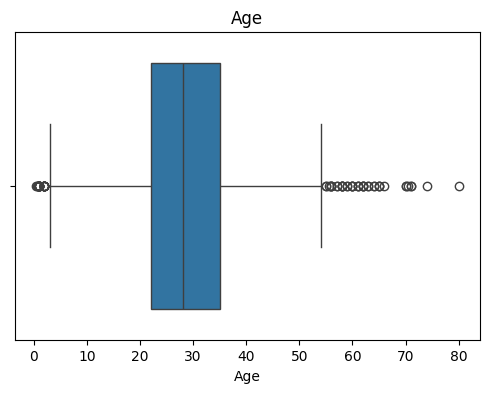

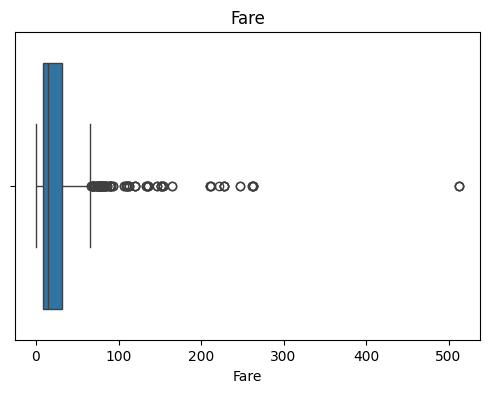

In [18]:
#outlier_handle 

col_outlier= ['Age', 'Fare']

for col in col_outlier:
    
    plt.figure(figsize= (6,4))
    sns.boxplot(data= df, x= df[col])
    plt.title(col)
    plt.show()
    

In [19]:
#handle

for col in col_outlier:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)

    IQR= Q3 - Q1

    upper_limit= Q3 + 1.5*IQR
    lower_limit= Q1 - 1.5*IQR

    df[col]= df[col].clip(lower_limit, upper_limit)
    

<Axes: xlabel='Cabin_Num', ylabel='Density'>

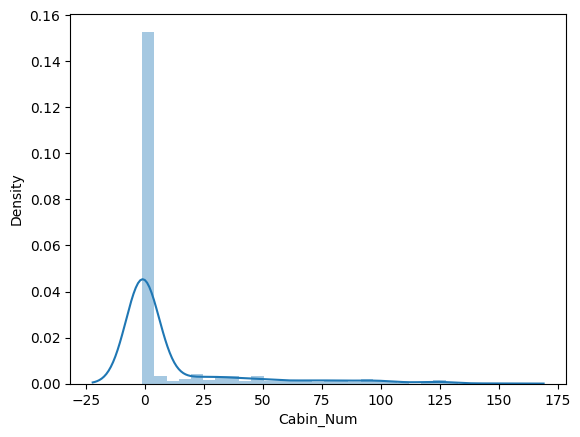

In [20]:
sns.distplot(df['Cabin_Num'])

In [21]:
df['Cabin_Num'].describe()

count    891.000000
mean      10.557800
std       27.242766
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max      148.000000
Name: Cabin_Num, dtype: float64

In [22]:
# mask = df['Cabin_Num'] != -1

# Q1 = df.loc[mask, 'Cabin_Num'].quantile(0.25)
# Q3 = df.loc[mask, 'Cabin_Num'].quantile(0.75)
# IQR = Q3 - Q1

# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR

# df.loc[mask, 'Cabin_Num'] = df.loc[mask, 'Cabin_Num'].clip(lower, upper)

In [23]:
# sns.boxplot(x= df['Cabin_Num'])

In [24]:
df['Has_Cabin'] = (df['Cabin_Num'] != -1).astype(int)
df.drop(columns=['Cabin_Num'], inplace=True)

In [25]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Cate,Has_Cabin
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,65.6344,S,B,1
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,S,E,1
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,S,Missing,0
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,65.6344,S,Missing,0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,28.0,0,0,PC 17585,65.6344,C,Missing,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Missing,0
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,S,Missing,0
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,S,Missing,0
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,S,Missing,0
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,S,Missing,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_Cate   891 non-null    object 
 12  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


<Axes: xlabel='Cabin_Cate'>

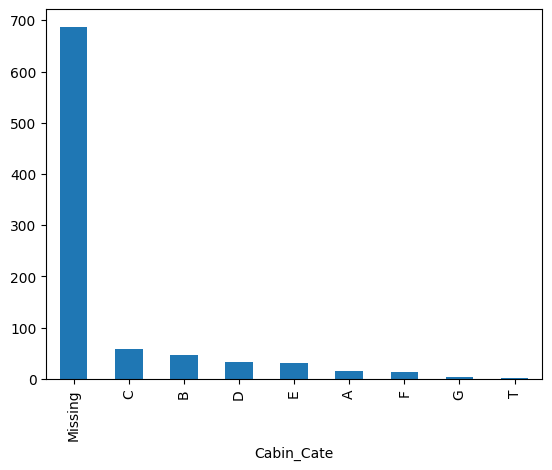

In [27]:
df['Cabin_Cate'].value_counts().sort_values(ascending= False).plot(kind= 'bar')

<Axes: xlabel='Embarked'>

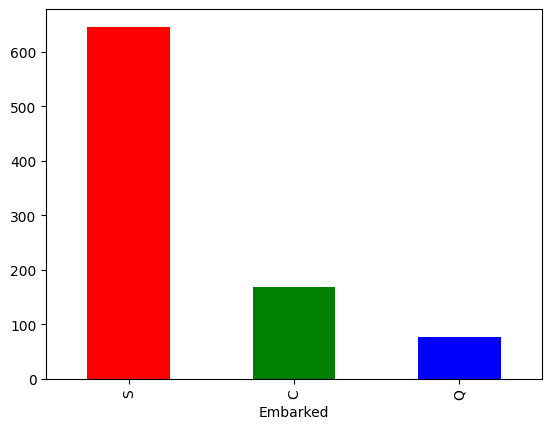

In [28]:
df['Embarked'].value_counts().sort_values(ascending= False).plot(kind= 'bar', color=['red', 'green', 'blue'])